In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from grouper import group_by_volume, group_by_time
from pyfolio.timeseries import perf_stats
from functools import partial
from utils import chart_price, plot, v_backtester, c_backtester, perf, perf_var
import sys
sys.path.append('/home/tomek/ib_tools')
from indicators import get_ATR, get_signals
import matplotlib.pyplot as plt
from typing import NamedTuple
from collections import namedtuple
%matplotlib inline

In [2]:
gc = pd.read_pickle('GC_30_2019.pickle')
nq = pd.read_pickle('NQ_30_2019.pickle')
#nkd = pd.read_pickle('nkd_23_2018.pickle')
es = pd.read_pickle('ES_30_2019.pickle')
cl = pd.read_pickle('CL_30_2019.pickle')

In [3]:
comp = pd.DataFrame({'gc': gc['returns'],
                    'nq': nq['returns'],
                    #'nkd': nkd['returns'],
                     'es': es['returns'],
                     'cl': cl['returns']
                    })
comp = comp.loc['20190201':]
comp

,gc,nq,es,cl
date,,,,
2019-02-01,0.000000,0.000000,-0.003226,0.005416
2019-02-04,-0.000461,0.003083,0.002284,0.006464
2019-02-05,0.000000,0.004803,0.004273,-0.001499
2019-02-06,0.003308,-0.005048,-0.001607,-0.000429
2019-02-07,0.001533,0.007956,-0.002746,0.011154
...,...,...,...,...
2019-10-28,0.002982,0.010447,0.005743,-0.004933
2019-10-29,0.000000,-0.002229,-0.000439,0.007281
2019-10-30,0.000270,0.001231,-0.000088,-0.001692


In [4]:
comp.corr()

,gc,nq,es,cl
gc,1.000000,0.099653,0.003503,0.23849
nq,0.099653,1.000000,0.412653,0.02161
es,0.003503,0.412653,1.000000,0.10753
cl,0.238490,0.021610,0.107530,1.00000


In [5]:
growth = comp+1
growth['comp'] = (.3 * growth['gc']) + (.3 * growth['nq'])  + (.2 * growth['es']) + (.2 * growth['cl'])
#growth['comp'] = growth.mean(axis=1)
i = growth.cumprod()

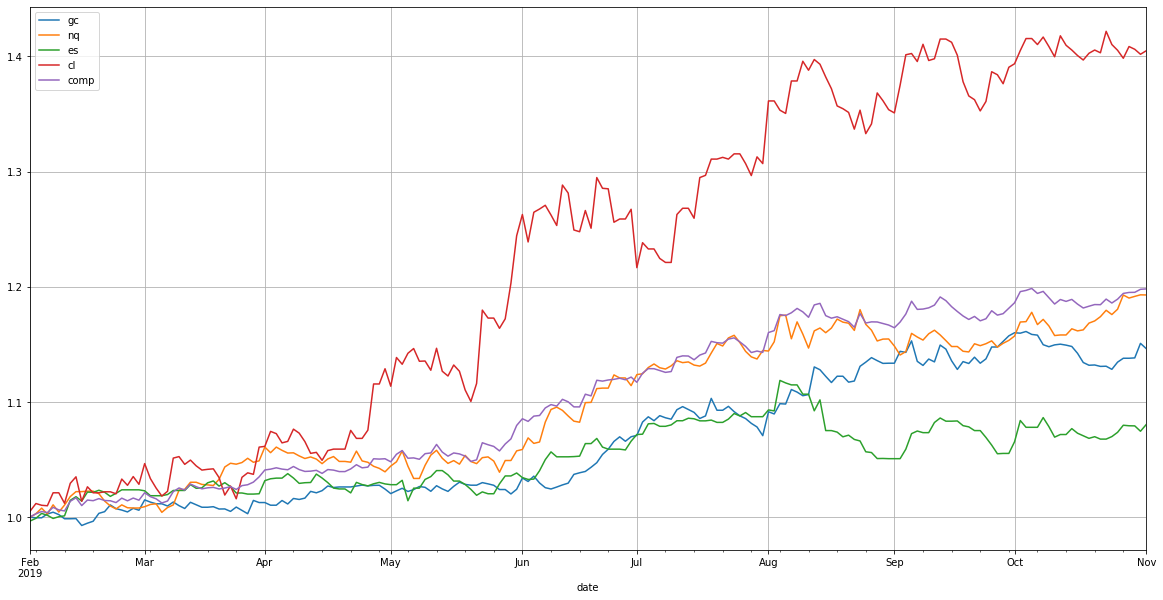

In [6]:
i.plot(figsize=(20,10), grid=True);

In [7]:
pd.DataFrame({n: perf_stats(i[n].pct_change().fillna(0)) for n in i.columns})

,gc,nq,es,cl,comp
Annual return,0.192028,0.254622,0.109197,0.537490,0.261028
Cumulative returns,0.146394,0.192947,0.083944,0.397328,0.197682
Annual volatility,0.075251,0.091034,0.080657,0.194321,0.064165
Sharpe ratio,2.372361,2.538056,1.325261,2.311262,3.648045
Calmar ratio,6.544458,7.636151,1.798553,8.899104,14.617268
Stability,0.919424,0.914031,0.684563,0.938683,0.954964
Max drawdown,-0.029342,-0.033344,-0.060714,-0.060398,-0.017858
Omega ratio,1.532109,1.538029,1.304183,1.529996,1.873521
Sortino ratio,4.507433,4.401902,2.096876,4.435859,7.477678
Skew,0.978657,0.347740,0.179907,0.976321,0.822943


In [8]:
m = i.resample('M').last().pct_change()
m

,gc,nq,es,cl,comp
date,,,,,
2019-02-28,NaN,NaN,NaN,NaN,NaN
2019-03-31,0.006649,0.040607,-0.003336,0.031382,0.019932
2019-04-30,0.011540,-0.009076,0.008367,0.064121,0.015203
2019-05-31,-0.000150,0.017502,0.009220,0.102284,0.027504
2019-06-30,0.044513,0.053535,0.026585,0.018454,0.038883
2019-07-31,0.000862,0.027396,0.019934,0.031282,0.019101
2019-08-31,0.058735,0.008720,-0.033505,0.035803,0.020773
2019-09-30,0.020956,-0.001068,0.004333,0.027204,0.012496
2019-10-31,-0.005646,0.034282,0.018247,0.008101,0.013910


In [9]:
.60 / np.sqrt(256)

0.0375